# First practice

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train.shape

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
model.metrics_names

# Basic classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
# load fashion mnist 
fashion_mnist = keras.datasets.mnist # fashion_mnist.load_data() does not exist for r1.5
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
uniq, count = np.unique(train_labels,return_counts=True)
np.vstack((uniq,count)).T

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.set_cmap('gray')
plt.grid(False)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test acciracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label== true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                        100*np.max(predictions_array),
                                        true_label),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
i = 5
plt.figure()
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

# Text classification with movie reviews

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

# get IMDB data
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

print(train_data[0])

In [ ]:
# convert word index to string
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(txt):
    return ' '.join([reverse_word_index.get(i, '?') for i in txt])


decode_review(train_data[5])

In [ ]:
# padding to make all reviews the same length
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       maxlen=256,
                                                       padding='post')
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       maxlen=256,
                                                       padding='post')

len(train_data[0]), len(test_data[0])

print(train_data[0])

In [ ]:
# build the model
vocab_size = 10000
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.summary()

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
# create a validation set
x_val = train_data[:10000]
partial_x_train = train_data[1000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val,y_val),
                   verbose=1)

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf() # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Regression

In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers # should test whether this work in 1.12, yes it works in 1.12
# from tensorflow.python.keras import layers # workaround for 1.5

print(tf.__version__)

1.12.0


In [2]:
# get Auto MPG dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 1us/step


'/home/osiris/.keras/datasets/auto-mpg.data'

In [3]:
# load into pandas
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
               'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, sep=" ", names=column_names,
                         na_values="?", comment='\t', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
# clean the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
# covert "Origin" to a one-hot since it is a category
origin = dataset.pop('Origin')

dataset['USA'] = (origin==1)*1.0
dataset['Europe'] = (origin==2)*1.0
dataset['Japan'] = (origin==3)*1.0

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [7]:
# split data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(index=train_dataset.index)

/home/osiris/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


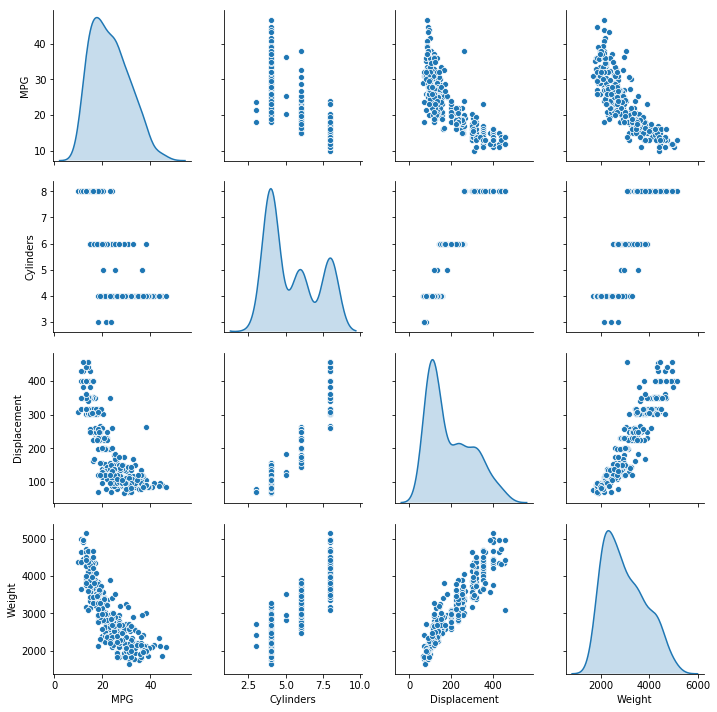

In [8]:
# inspec the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [9]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [10]:
# split features from labels
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [11]:
# normalize the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [12]:
# Build a model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(optimizer=optimizer,
                 loss='mse',
                 metrics=['mae','mse'])
    return model

In [14]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [16]:
# try out the model
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch) # check whether .values is needed in 1.12, it's needed in 1.12
example_result

array([[-0.08125846],
       [-0.24107555],
       [-0.6906897 ],
       [-0.3854979 ],
       [-0.785884  ],
       [-0.19692272],
       [-0.8161127 ],
       [-0.53219897],
       [-0.12408123],
       [-0.7289312 ]], dtype=float32)

In [17]:
# Train the model
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
            
EPOCHS = 1000

history = model.fit(normed_train_data.values, train_labels, epochs=EPOCHS, 
                   validation_split=0.2, verbose=0,
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,9.441727,2.359432,9.441727,2.652160,1.005413,2.652160,995
996,9.543748,2.362226,9.543748,2.497300,0.963679,2.497300,996
997,9.091303,2.319411,9.091303,2.719138,1.028769,2.719138,997
998,9.200399,2.322203,9.200399,2.466597,0.942106,2.466597,998
999,8.845747,2.298466,8.845747,2.526058,0.982731,2.526058,999


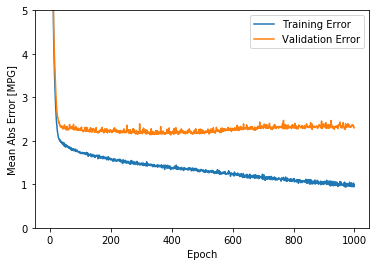

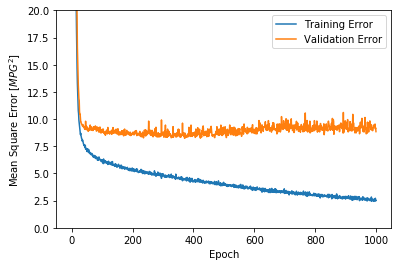

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    ax = hist.plot(x='epoch',y=['mean_absolute_error','val_mean_absolute_error'],
                  ylim=[0,5])
    # ax.set_ylim([0,7])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Abs Error [MPG]')
    ax.legend(['Training Error','Validation Error'])

    ax = hist.plot(x='epoch',y=['mean_squared_error','val_mean_squared_error'],
                  ylim=[0,20])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Square Error [$MPG^2$]')
    ax.legend(['Training Error','Validation Error'])
    
plot_history(history)


.................................................................

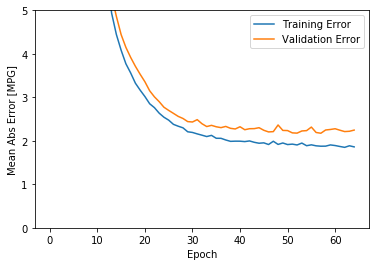

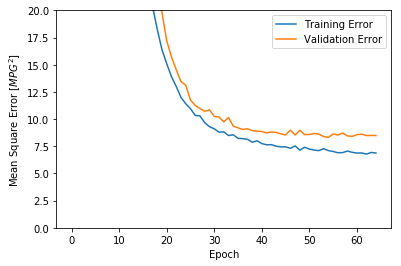

In [20]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data.values, train_labels,
                    epochs=EPOCHS, validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])
plot_history(history)

In [21]:
loss, mae, mse = model.evaluate(normed_test_data.values, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:0.2f} MPG".format(mae))

Testing set Mean Abs Error: 1.84 MPG


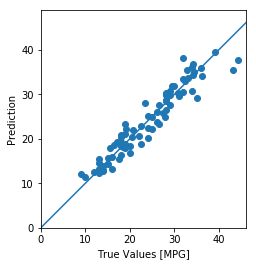

In [22]:
test_predictions = model.predict(normed_test_data).flatten()
# test_predictions.flatten()

import matplotlib.pyplot as plt

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Prediction')

plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100,100], [-100,100])

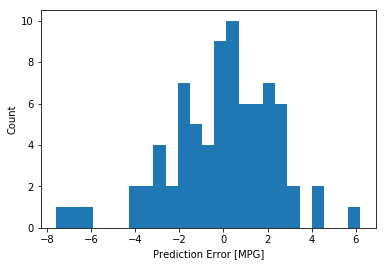

In [23]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')